# 导入所需要的包

In [1]:
import numpy as np    # Python中进行数值计算的库
import pandas as pd    # Python中进行数据处理的库
import warnings
warnings.filterwarnings('ignore') #  忽略弹出的warnings

# 读数据

In [2]:
data = pd.read_csv('Lending_Club.csv',encoding="ISO-8859-1")#这里注意，一定要把encoding设置为ISO-8859-1

In [3]:
data.shape #查看数据量大小

(130772, 145)

In [4]:
#查看部分数据
data.head(10)#可以看出有很多确实值

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000,36 months,0.2039,373.63,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8000,8000,8000,36 months,0.0683,246.40,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000,20000,20000,60 months,0.0683,394.43,A,A3,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,16000,16000,16000,36 months,0.1403,547.08,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1000,1000,1000,36 months,0.2387,39.17,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,12875,12875,12875,36 months,0.1549,449.42,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,12000,12000,12000,60 months,0.2039,320.54,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,10000,10000,10000,60 months,0.1942,261.73,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,6500,6500,6500,36 months,0.1646,230.00,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,9500,9500,9500,36 months,0.1646,336.16,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# 查看数据集缺失情况

In [5]:
### 查看数据集缺失情况
missingDf = data.isnull().sum().sort_values(ascending=False).reset_index()#常用的数据缺失值查看方法，ascending=False是降序排列
missingDf.columns = ['feature', 'miss_num']    
missingDf['miss_percentage'] = missingDf['miss_num'] / data.shape[0]    # 缺失值比例
missingDf.head(10)    # 缺失值最多的前十列特征

,feature,miss_num,miss_percentage
0,settlement_term,130772,1.0
1,payment_plan_start_date,130772,1.0
2,member_id,130772,1.0
3,url,130772,1.0
4,desc,130772,1.0
5,settlement_percentage,130772,1.0
6,hardship_type,130772,1.0
7,hardship_reason,130772,1.0
8,hardship_status,130772,1.0
9,deferral_term,130772,1.0


In [6]:
print("原始数据集144列特征中:\n" )
print("有%d列特征含有缺失值" % missingDf[missingDf['miss_num'] > 0].shape[0])
print("有%d列的特征缺失值比例在30%%以上" % missingDf[missingDf['miss_percentage'] > 0.3].shape[0])

原始数据集144列特征中:

有60列特征含有缺失值
有43列的特征缺失值比例在30%以上


# 缺失值处理
  1：直接删除缺失值过多的特征或样本
  2：对缺失值进行填充，一般使用平均值或者最大最小值
  3：用其他未缺失的样本对缺失的样本特征进行预测

1、直接删除

In [7]:
thr = (1 - 0.3) * data.shape[0]  # 可以根据实际情况设定不同阈值, 此处设为30%, 则非缺失值的数量大于70%
data = data.dropna(thresh=thr, axis=1)     #若某一列数据缺失的数量超过阀值就会被删除
print("去除掉缺失值占比大于0.3的特征之后,当前还剩%d列特征" %(data.shape[1]))

去除掉缺失值占比大于0.3的特征之后,当前还剩102列特征


In [8]:
### 缺失特征过多的样本可以考虑直接整行删除
data['row_missing'] = data.apply(lambda x: x.isnull().sum(), axis=1).to_frame()     # 计算每条样本的缺失值列数
print(data['row_missing'].value_counts())    # 观察所有样本行的缺失值情况

0     63753
1     41794
2     12719
3      6714
4      3483
5      1439
6       551
7       205
8        65
9        21
10       18
11        9
13        1
Name: row_missing, dtype: int64


缺失列数在8列以上的样本有114条，缺失值较多且样本数较少，因此可以考虑将这些样本直接删除。

In [12]:
data = data[data['row_missing'] < 8]       # 删掉缺失值大于等于8列的样本
data.drop(['row_missing'], axis=1, inplace=True)    # 删掉刚刚加入原始数据集的统计列
print("去除掉缺失特征大于35列的样本之后，当前还剩%d行数据" % data.shape[0])

KeyError: 'row_missing'

2.使用固定值进行填充

In [ ]:
data.isnull().sum().sort_values(ascending=False).reset_index()

以emp_length这列特征为例，它代表贷款客户的工作年限，统计可知其中有10385条缺失值，原始数据集中用'n/a'表示。

In [13]:
### 特征emp_length中的缺失值可以尝试用特殊字符表示，代表独立的一类特征值。
print("原始数据集的emp_length特征取值情况：\n", data['emp_length'].value_counts())
data.loc[data['emp_length']=='', 'emp_ln/aength'] = 'Unknown'    # 将emp_length特征列中的缺失值替换为特殊字符'Unknown'
print("\n使用固定值填充后emp_length特征取值情况：\n", data['emp_length'].value_counts())

原始数据集的emp_length特征取值情况：
 10+ years    43802
2 years      12290
3 years      10865
< 1 year      8894
1 year        8635
4 years       8631
5 years       8199
6 years       6088
7 years       4955
8 years       4334
9 years       3580
Name: emp_length, dtype: int64

使用固定值填充后emp_length特征取值情况：
 10+ years    43802
2 years      12290
3 years      10865
< 1 year      8894
1 year        8635
4 years       8631
5 years       8199
6 years       6088
7 years       4955
8 years       4334
9 years       3580
Name: emp_length, dtype: int64


数值特征通常采用其他样本的均值或中位数进行填充。以dti为例，它代表贷款人每月还款占其收入的比例（去掉百分号后的值），观察其统计信息。可知该列最大值为999.000000，很明显这是一个极大的异常值，如果对该列采用均值进行填充，会受到极端值的影响，故此处选用中位数进行填充。当然，这种简单的方法还有提升的空间，例如像dti这种特征可以结合贷款人的收入水平（annual_inc）进行先分组后填充。

In [18]:
### dti属性是数值特征，可以使用均值或中位数进行填充
print("dti特征列有%d个缺失值\n" % data['dti'].isnull().sum())
print("dti特征列的统计信息:\n", data['dti'].describe())
data['dti'].fillna(data['dti'].median(), inplace=True)    # 这里median()采用中位数填充,也可以使用均值mean()
print("\n填充中位数后dti特征列的统计信息:\n", data['dti'].describe())
print("\n此时dti特征列有%d个缺失值\n" % data['dti'].isnull().sum())

dti特征列有317个缺失值

dti特征列的统计信息:
 count    130341.000000
mean         19.296477
std          19.480767
min           0.000000
25%          11.100000
50%          17.390000
75%          24.730000
max         999.000000
Name: dti, dtype: float64

填充中位数后dti特征列的统计信息:
 count    130658.000000
mean         19.291851
std          19.457347
min           0.000000
25%          11.110000
50%          17.390000
75%          24.717500
max         999.000000
Name: dti, dtype: float64

此时dti特征列有0个缺失值



3、建模预测缺失值并填充

In [19]:
### 以revol_util(信用账户的使用率)特征为例，导入sklearn的随机森林算法预测缺失值
from sklearn.ensemble import RandomForestRegressor    

rfDf = data.copy()
# 用revol_util特征值非空的样本构建训练集，revol_util特征值缺失的样本构建测试集
rfDf_train = rfDf.loc[rfDf['revol_util'].notnull()]
rfDf_test = rfDf.loc[rfDf['revol_util'].isnull()]

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
rfDf_train.notnull().sum().reset_index()

,index,0
0,loan_amnt,130528
1,funded_amnt,130528
2,funded_amnt_inv,130528
3,term,130528
4,int_rate,130528
5,installment,130528
6,grade,130528
7,sub_grade,130528
8,emp_title,119952
9,emp_length,120145


In [21]:
data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv                 int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

In [25]:
col = ['loan_amnt', 'int_rate', 'installment', 'revol_bal', 'collection_recovery_fee']    # 原始数据集中的无缺失数值特征
# 划分训练数据和标签（label）
X = rfDf_train[col]
y = rfDf_train['revol_util']
# 训练过程
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)    # 这里重在理解过程，因此仅简单选取部分参数
rf.fit(X, y)
# 预测过程
pred = rf.predict(rfDf_test[col])

In [26]:
rfDf.loc[(rfDf['revol_util'].isnull()), 'revol_util'] = pred    # 填补缺失值
print("此时的revol_util特征统计指标:\n")
print(rfDf['revol_util'].describe()) 

ValueError: Must have equal len keys and value when setting with an iterable

# 异常值处理

异常值是数据集中存在的非正常的值，也称为离群点。异常值有可能是不正确的“脏数据”，也可能是正确的异常数据，需要具体问题具体分析。例如：人的身高100m、人的体重60g是属于不正确的“脏数据”；

异常值的处理异常值通常需要进行处理，否则在某些场景中会导致预测结果受到负面影响。处理方法通常有以下几种：

1：直接删除异常样本：当异常值数量不多且易于判断时，可以直接删除。
2：用均值替代异常样本
3：视为缺失值：某些情况下，可以将异常值当成缺失值处理，利用缺失值的填充方法处理异常。

对异常值的不同处理方法，下面我们采用Lending Club贷款数据集中的数据进行举例说明。

1、异常值处理1--简单统计分析 & 删除异常值

Lending Club贷款数据集中的revol_util特征为例，它表示信用账户的使用率（去掉百分号），因此容易理解这列特征的值不应超过100。观察到异常样本有1300条，占总样本的比例很小，可以将这些样本直接删除。

In [27]:
print(rfDf['revol_util'].describe())

count    130658.000000
mean          0.433897
std           0.250183
min           0.000000
25%           0.236000
50%           0.416000
75%           0.620000
max           1.244000
Name: revol_util, dtype: float64


In [28]:
print("revol_util特征列的异常样本数为: ", data[data['revol_util'] > 1].shape[0])
data.drop(data[data['revol_util'] > 1].index, inplace = True)    # 根据索引删除样本

revol_util特征列的异常样本数为:  197


2、异常值处理2--3σ原则 & 均值替代异常样本

以dti特征为例，它表示贷款人每月还款占其收入的比例（去掉百分号后的值），容易理解这列特征的值不应超过100，将超过100的值视为无意义的异常值

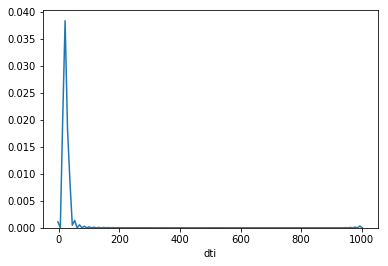

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt    # 可视化
# 在Jupyter notebook里嵌入图片
%matplotlib inline

ax = sns.distplot(data['dti'],kde=True,hist=False)
plt.show()

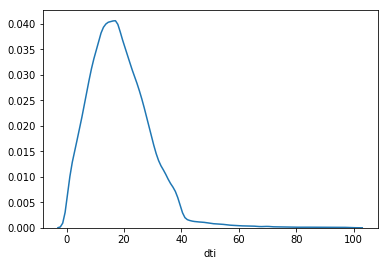

In [30]:
# 去掉高于100的部分再次观察
norDf = data[data['dti'] <= 100.0]
sns.distplot(norDf['dti'],kde=True,hist=False)
plt.show()

可以观察到dti的分布近似于正态分布，根据实际情况分析：大部分贷款人dti小于40（即比例为40%），还款压力较小；而dti高的贷款人必然存在较大的还款压力，也因此有坏账的风险，这部分值也可以视为异常值，不过这部分异常值对模型预测是有意义的，因此予以保留。

In [31]:
# 根据3σ原则计算异常值区间
dti_mean = norDf['dti'].mean()    # 计算均值
dti_std = norDf['dti'].std()    # 计算方差
print("大于 %f 的可以视为异常值" % (dti_mean + 3*dti_std))
print("小于 %f 的可以视为异常值" % (dti_mean - 3*dti_std))

大于 51.243700 的可以视为异常值
小于 -13.951381 的可以视为异常值


将大于100的那部分dti值进行异常值处理，采用去掉这部分异常值的dti均值进行替代。

In [32]:
data.loc[data['dti'] > 100, 'dti'] = dti_mean    # 均值替代
print("此时dti特征列还有%d个大于100的特征值" % (data[data['dti'] > 100]).shape[0])

此时dti特征列还有0个大于100的特征值


3、异常值处理3--箱型图 & 视为缺失值

以annual_inc为例，它表示贷款人的年收入。

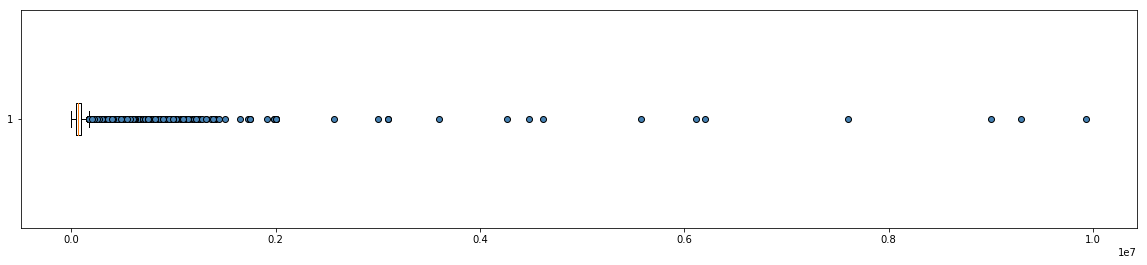

In [33]:
# 绘制箱型图分析
bp_list = list(data['annual_inc'])

plt.figure(figsize=(20,4)) # 建立图像
plt.boxplot(bp_list, vert=False, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
plt.show() # 展示箱型图

In [34]:
# 观察annual_inc列的统计值
data['annual_inc'].describe()

count    1.304610e+05
mean     7.866600e+04
std      8.751727e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      9.930475e+06
Name: annual_inc, dtype: float64

In [35]:
# 箱型图的边界
q1 = data['annual_inc'].describe()['25%']
q3 = data['annual_inc'].describe()['75%']
iqr = q3 - q1
print("箱型图上须：", q3 + 1.5*iqr)
print("箱型图下须：", q1 - 1.5*iqr)

箱型图上须： 170000.0
箱型图下须： -30000.0


由上述可见大多数贷款人的年收入都在150万以下，与Lending Club的主业中小额贷款也较为相符，可以将箱型图中的大于150万的异常值进行一定的处理。这里将其视为缺失值，采用固定值进行替代，统一定为150万。

In [36]:
data.loc[data['annual_inc'] > 1500000.0, 'annual_inc'] = 1500000.0    # 固定值替代
print("此时annual_inc特征列还有%d个大于150万的特征值" % (data[data['annual_inc'] > 1500000.0]).shape[0])

此时annual_inc特征列还有0个大于150万的特征值


总结：
本章节主要介绍了数据预处理中常见的两种问题--缺失值和异常值。我们利用Lending Club贷款数据集进行了两种问题的分析，并对两种问题提出了相对应的解决方法。其中对于缺失值，我们注意介绍了采用直接删除，数据填补和不处理三种方法进行处理。而异常值的处理我们注意介绍了：直接删除异常样本，用均值替代异常样本，视为缺失值这三种解决方法。